## Manejo del tiempo en Python y con Pandas

Un timestamp es una marca de tiempo, es decir, una marca temporal en un archivo o registro que indica la hora y fecha en que se creó o modificó. Se utiliza comúnmente en sistemas de información para registrar la hora y fecha de eventos importantes, como cuándo se creó un archivo o cuándo se realizó una transacción.

Muchas veces encontramos el timestamp como el número de segundos transcurridos desde un punto de referencia, que suele ser el 1 de Enero de 1970 (conocido como Unix Timestamp), para representar el momento en que se produjo el evento. Este es un formato más simple y ocupa menos espacio, pero es menos legible para las personas y requiere un procesamiento adicional para convertirlo en una fecha legible.

In [376]:
# Ejercicio

# 1.- Calcular el nº de segundos transcurridos desde ayer a esta misma hora

# 2.- Calcular el nº de segundos transcurridos desde ayer a las 0h hasta ahora

# 3.- Calcular el nº de segundos transcurridos desde las campanadas de Nochevieja hasta ahora

# 4.- Calcular el nº de segundos transcurridos desde el 1 de Agosto de 2022 a las 0h hasta ahora

### Timestamps en Python

¿Cómo obtengo el timestamp de ahora con Python?

En Python, puedes obtener el timestamp actual utilizando el módulo time y la función time(). La función time() devuelve el número de segundos desde el 1 de Enero de 1970 (el punto de referencia para los timestamps en sistemas basados en Unix), por lo que el valor devuelto representa el timestamp actual. Ejemplo de uso:

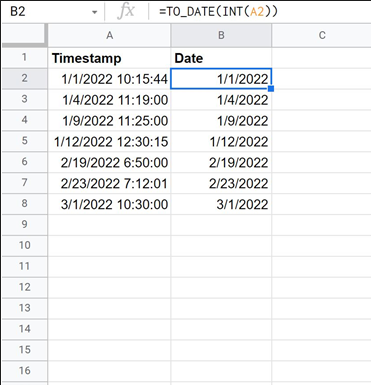 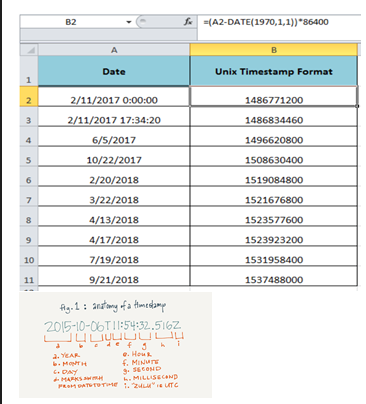 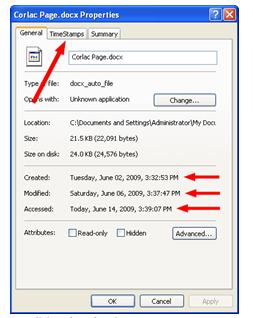

In [377]:
import time

current_timestamp = time.time()
print(current_timestamp)

# Esta opción es la más simple y universal para ordenadores y programas

1674642475.211676


También existe la opción de usar el paquete datetime, que contiene una clase datetime.datetime que tiene un método now() que devuelve la fecha y hora actual.

In [378]:
from datetime import datetime

current_datetime = datetime.now()
print(current_datetime)

# Esta opción es la más legible para personas

2023-01-25 11:27:55.307214


También se puede obtener el timestamp de una fecha cualquiera:

In [379]:
from datetime import datetime

date_string = "2022-11-01 12:34:56"
date_object = datetime.strptime(date_string, "%Y-%m-%d %H:%M:%S")
timestamp = date_object.timestamp()

print(timestamp)

1667302496.0


Para ello importamos el módulo datetime y luego creamos una variable date_string que contiene una fecha en formato de cadena. Utilizamos el método strptime() para crear un objeto de fecha y hora a partir de la cadena de fecha. Finalmente, utilizamos el método timestamp() para convertir el objeto de fecha y hora en un timestamp.

### Timestamps en Pandas

In [380]:
import pandas as pd

In [381]:
# Especificando sólo la fecha
t = pd.Timestamp('2017-09-01')
print(t)
print(type(t))
t

2017-09-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Timestamp('2017-09-01 00:00:00')

In [382]:
# Especificando fecha y hora con enteros
pd.Timestamp(2017,11,29,13,45,0)

Timestamp('2017-11-29 13:45:00')

In [383]:
# Especificando fecha y hora con cadena de texto y formato americano
pd.Timestamp('9/1/2017 10:05AM')

Timestamp('2017-09-01 10:05:00')

In [384]:
# Especificando fecha y hora con cadena de texto sin separadores
pd.to_datetime('20170901 100500', format='%Y%m%d %H%M%S')

Timestamp('2017-09-01 10:05:00')

Para obtener un timestamp en formato de número entero con datos de un dataframe de Pandas, podemos usar el siguiente código:

In [385]:
# Crear dataframe
df = pd.DataFrame({'fecha':['2017-09-01 10:05:00']})

# Convertir celdas de texto en celdas de tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Pasar a entero
df['timestamp'] = df.fecha.astype('int64') // 10**9
df

,fecha,timestamp
0,2017-09-01 10:05:00,1504260300


Tras convertir a formato de fecha en el DataFrame utilizando el método 'pd.to_datetime()', el resultado de esta conversión se asigna de nuevo a la columna 'fecha'. Finalmente, se imprime el valor de la columna 'fecha' convertido a un entero de 64 bits (int64) y dividido entre 10^9, lo que transforma la fecha en un timestamp de Unix (POSIX: número de segundos desde el 1 de enero de 1970).

"//" en Python es el operador de división entera. Es utilizado para dividir dos números y devolver el cociente como un entero. Es similar a la división normal, pero redondea el resultado hacia abajo al número entero más cercano. Por ejemplo:

5 // 2 es 2
4 // 3 es 1
4 /  3 es 1.3333333333333333

#### Conversión inversa: de timestamp (número entero) a datetime:

In [386]:
from datetime import datetime, timedelta

# Transform timestamp into datetime format
# timestamp resolution is millisecond (x/1000)
# and start counting on 1970
posix_epoch = datetime(1970, 1, 1)
# df['fecha2'] = df['timestamp'].apply(lambda x: posix_epoch + timedelta(seconds = x/1000)) # fórmula válida para timestamps con resolución de milisegundos
df['fecha2'] = df['timestamp'].apply(lambda x: posix_epoch + timedelta(seconds = x))
df

,fecha,timestamp,fecha2
0,2017-09-01 10:05:00,1504260300,2017-09-01 10:05:00


### Period

In [387]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [388]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### ¿Qué es pd.Period?

pd.Period es una clase en la librería de análisis de datos Pandas en Python que se utiliza para representar un período de tiempo. Un período de tiempo es un intervalo de tiempo que comienza y termina en un punto específico. Un ejemplo de un período de tiempo podría ser un día, un mes, un trimestre o un año.

pd.Period puede ser inicializado con una fecha o un timestamp, y se puede especificar el nivel de frecuencia. Ejemplo de uso:

In [389]:
import pandas as pd

p = pd.Period('2020Q1', freq='Q-JAN')

print(p)
print(type(p))
p

2020Q1
<class 'pandas._libs.tslibs.period.Period'>


Period('2020Q1', 'Q-JAN')

En este caso se genera un objeto Period con fecha 2020 en primer trimestre, y la frecuencia de Q-JAN (cada trimestre con inicio en Enero).

Una vez creado el objeto, se puede acceder a atributos como el año, el mes o el día, o realizar operaciones aritméticas con otros objetos Period con la misma frecuencia. También se puede convertir a distintos formatos como datetime, timestamp, entre otros.

### Datetimeindex

pd.Series es una función de la librería pandas de Python, que se utiliza para crear una serie de datos unidimensional con etiquetas o índices. Una serie es similar a una columna en una hoja de cálculo o una tabla de base de datos, y puede contener una variedad de tipos de datos.

La sintaxis para crear una serie es:

pd.Series(data, index=index)

- data puede ser una lista, un diccionario, un arreglo numpy, etc.
- index es opcional y especifica las etiquetas o índices para los datos en la serie. Si no se especifica, los índices se generarán automáticamente como un rango numérico.

Una vez creada, se puede acceder a los datos en una serie utilizando los índices, y se pueden realizar operaciones matemáticas y estadísticas en los datos.

In [390]:
# Creamos una serie con índice timestamp
# 
# # La función list() en Python se utiliza para convertir un objeto en una lista.
# Por ejemplo, si se tiene una cadena, se puede convertir en una
# lista de caracteres utilizando list("cadena"), o si se tiene un
# objeto iterable, como un rango o un objeto tipo tupla, se puede
# convertir en una lista utilizando list(iterable).
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'),
                             pd.Timestamp('2016-09-02'),
                             pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

### ¿Qué diferencia hay entre Series y Dataframe en Pandas?

pd.Series y pd.DataFrame son dos tipos de estructuras de datos en la librería Pandas de Python.

- Una serie es una estructura de datos unidimensional que tiene un índice y un conjunto de valores. Es similar a una columna en una hoja de cálculo o una tabla de base de datos.

- Un DataFrame es una estructura de datos bidimensional, también similar a una hoja de cálculo o una tabla de base de datos. **Un DataFrame se compone de varias series**, donde cada serie es una columna con un nombre específico.

In [391]:
# El índice de esta serie es un timestamp
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Convirtiendo a DateTime

In [392]:
# Creamos un dataframe con índice timestamp
import numpy as np
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,63,11
"Aug 29, 2014",37,66
2015-06-26,68,64
7/12/16,65,56


In [393]:
# No lo reconoce como índice timestamp
type(ts3.index)

pandas.core.indexes.base.Index

In [394]:
# Debo convertir antes al formato datetime para que lo reconozca como índice timestamp
ts3.index = pd.to_datetime(ts3.index)
ts3.index, type(ts3.index)

(DatetimeIndex(['2013-06-02', '2014-08-29', '2015-06-26', '2016-07-12'], dtype='datetime64[ns]', freq=None),
 pandas.core.indexes.datetimes.DatetimeIndex)

In [395]:
# Una vez convertido, muestra el timestamp con un formato homogéneo
ts3

,a,b
2013-06-02,63,11
2014-08-29,37,66
2015-06-26,68,64
2016-07-12,65,56


### TimeDeltas

Un delta, en matemáticas y en programación, es una medida de cambio o diferencia entre dos valores o elementos. Por ejemplo, si se tiene una serie de números y se quiere conocer el cambio entre cada número consecutivo, se puede calcular el delta como la diferencia entre cada número y el número anterior. Por ejemplo, si se tiene la serie [1, 3, 5, 7], los deltas serían [3-1, 5-3, 7-5] = [2, 2, 2].

En programación, se utiliza comúnmente para calcular el cambio en una variable en un tiempo específico, como el cambio en la posición de un objeto en un juego o en un gráfico.

En resumen, el delta es una medida de la diferencia o cambio entre dos elementos, ya sea dos números, dos posiciones, dos tiempos, etc.

In [396]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [397]:
pd.Period('5/2017') - pd.Period('3/2016')

<14 * MonthEnds>

In [398]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D')

Timestamp('2016-09-14 08:10:00')

### Aplicación de deltas en bolsa y crypto:

La **volatilidad** es una medida de la variabilidad o fluctuación en el precio de un activo, como una acción, una criptomoneda o una materia prima. Puede medirse en términos de la desviación estándar de los rendimientos o los cambios en el precio del activo.

En teoría, un **delta** es una medida de la variación o cambio en el precio de un activo, pero se utiliza principalmente en el contexto de opciones financieras, donde indica la sensibilidad del precio de una opción a cambios en el precio subyacente.

En el caso de criptomonedas, el **delta** podría ser utilizado para medir la sensibilidad del precio de una criptomoneda a cambios en el precio de otra criptomoneda o activo subyacente. Sin embargo, en general la volatilidad es una medida mas adecuada para medir la variabilidad del precio de una criptomoneda.

### Fechas en DataFrames

In [399]:
# Pandas nos permite crear rangos de fechas
dates = pd.date_range('2017-04-06', periods=4, freq='D')
dates

DatetimeIndex(['2017-04-06', '2017-04-07', '2017-04-08', '2017-04-09'], dtype='datetime64[ns]', freq='D')

In [400]:
dates = pd.date_range('2017-04-06', periods=4, freq='M')
dates

DatetimeIndex(['2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31'], dtype='datetime64[ns]', freq='M')

In [401]:
dates = pd.date_range('2017-04-06', periods=4, freq='2W-THU')
dates

DatetimeIndex(['2017-04-06', '2017-04-20', '2017-05-04', '2017-05-18'], dtype='datetime64[ns]', freq='2W-THU')

In [402]:
# Ejercicio: explicar cómo creamos estas dos columnas del dataframe
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 4).cumsum(),
                   'Count 2': 120 + np.random.randint(-5, 10, 4)},
                   index=dates)
df

,Count 1,Count 2
2017-04-06,104,125
2017-04-20,107,129
2017-05-04,107,116
2017-05-18,102,126


In [403]:
# El desplazamiento (shift) es útil para realizar cálculos
# comparativos dentro de una misma columna
df['Count 1'].shift()

2017-04-06      NaN
2017-04-20    104.0
2017-05-04    107.0
2017-05-18    107.0
Freq: 2W-THU, Name: Count 1, dtype: float64

También puede usarse diff que hace el shift y la resta en una sola instrucción:

La función **df.diff()** en pandas es utilizada para calcular la diferencia entre los valores de un DataFrame o una Serie en un punto dado y el valor anterior. Esta función devuelve un nuevo objeto con las diferencias calculadas en cada fila.

In [404]:
df.diff()

,Count 1,Count 2
2017-04-06,NaN,NaN
2017-04-20,3.0,4.0
2017-05-04,0.0,-13.0
2017-05-18,-5.0,10.0


In [405]:
df.diff(2)

,Count 1,Count 2
2017-04-06,NaN,NaN
2017-04-20,NaN,NaN
2017-05-04,3.0,-9.0
2017-05-18,-5.0,-3.0


 ##  Trabajo con series de tiempo: calcular variaciones con shift()

Cuando se trabaja con series de tiempo, es muy habitual trabajar agregar al dataframe una variable que indique cuánto se modificó determinado valor desde la última medición.

In [406]:
# Creamos el dataframe
df= pd.DataFrame()

# Agregamos las series de datos
df['hora'] = ['10:30', '10:31', '10:38', '10:40', '10:41']
df['cantidad'] = [20, 20, 9, 12, 12]

df

,hora,cantidad
0,10:30,20
1,10:31,20
2,10:38,9
3,10:40,12
4,10:41,12


In [407]:
# Convertir hora a datetime
df['hora'] = df['hora'].apply(lambda x: pd.to_datetime(x))

In [408]:
df['hora'].dtype

dtype('<M8[ns]')

dtype('<M8[ns]') es un tipo de datos en pandas que representa una fecha y hora con precisión de nanosegundos. El carácter 'M' en el tipo de datos indica que se trata de un tipo de fecha-hora, el 8 indica que es de 64 bits y el [ns] indica que tiene precisión de nanosegundos. El '<' indica que es una representación nativa de sistema, es decir, el ordenamiento dependerá del sistema operativo.

Más detalles en:
https://stackoverflow.com/questions/29206612/difference-between-data-type-datetime64ns-and-m8ns

In [409]:
# Podemos calcular deltas en ambas columnas
df.diff()

,hora,cantidad
0,NaT,NaN
1,0 days 00:01:00,0.0
2,0 days 00:07:00,-11.0
3,0 days 00:02:00,3.0
4,0 days 00:01:00,0.0


In [410]:
# Podemos hacer el cálculo en dos partes, primero shift y luego restar:
df['cantidad_anterior'] = df['cantidad'].shift(1)
df

,hora,cantidad,cantidad_anterior
0,2023-01-25 10:30:00,20,NaN
1,2023-01-25 10:31:00,20,20.0
2,2023-01-25 10:38:00,9,20.0
3,2023-01-25 10:40:00,12,9.0
4,2023-01-25 10:41:00,12,12.0


In [411]:
df['variacion'] = df['cantidad'] - df['cantidad_anterior']

In [412]:
df

,hora,cantidad,cantidad_anterior,variacion
0,2023-01-25 10:30:00,20,NaN,NaN
1,2023-01-25 10:31:00,20,20.0,0.0
2,2023-01-25 10:38:00,9,20.0,-11.0
3,2023-01-25 10:40:00,12,9.0,3.0
4,2023-01-25 10:41:00,12,12.0,0.0


### Variaciones con agrupamiento

Es muy habitual tener que calcular esto mismo pero por cada individuo o categoría que interesa estudiar.

La función df.groupby() en pandas se utiliza para agrupar los datos de un DataFrame en función de uno o varios criterios específicos. El criterio de agrupamiento se especifica mediante una columna o un conjunto de columnas del DataFrame.

La sintaxis básica es:

df.groupby(by=grouping_columns)

Una vez que se ha agrupado el DataFrame, se pueden aplicar varias funciones de agregación, como mean(), sum(), count(), etc.

Ejemplo:

# Agrupando por la columna "color"
df.groupby('color').mean()
En este ejemplo se agrupan los datos en función de los valores de la columna 'color' y se calcula el promedio de cada grupo.

También se puede agrupar por varias columnas.

Ejemplo:

df.groupby(['color','size']).mean()
En este caso los datos se agrupan primero por 'color' y luego por 'size' y se calcula el promedio de cada subgrupo.

In [413]:
# Ejemplo 1
dfa = pd.DataFrame({'Animal': ['Falcon', 'Falcon', 'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
print(dfa)

dfb = dfa.groupby("Animal").mean()
print(dfb)

   Animal  Max Speed
0  Falcon      380.0
1  Falcon      370.0
2  Parrot       24.0
3  Parrot       26.0
        Max Speed
Animal           
Falcon      375.0
Parrot       25.0


In [414]:
# Ejemplo 2
df = pd.DataFrame()

# Creamos columna operador para agrupar en categorías
df['operador'] = ['Q8', 'Q8', 'Q8', 'Q7', 'Q9', 'Q9']

df['hora'] = ['10:30', '10:31', '10:32', '10:38', '10:40', '10:41']
df['cantidad'] = [15, 20, 10, 9, 12, 12]

df

,operador,hora,cantidad
0,Q8,10:30,15
1,Q8,10:31,20
2,Q8,10:32,10
3,Q7,10:38,9
4,Q9,10:40,12
5,Q9,10:41,12


In [415]:
# La función transform() aplica la función shift() a la columna 'cantidad'
# de cada grupo de datos agrupados y reemplaza los valores en la
# columna 'cantidad' con los valores desplazados.

df['cantidad_ant_operador'] = df.groupby(['operador'])['cantidad'].transform(lambda x:x.shift())

In [416]:
df

,operador,hora,cantidad,cantidad_ant_operador
0,Q8,10:30,15,NaN
1,Q8,10:31,20,15.0
2,Q8,10:32,10,20.0
3,Q7,10:38,9,NaN
4,Q9,10:40,12,NaN
5,Q9,10:41,12,12.0


In [417]:
df['variacion_operador'] = df['cantidad'] - df['cantidad_ant_operador']
df

,operador,hora,cantidad,cantidad_ant_operador,variacion_operador
0,Q8,10:30,15,NaN,NaN
1,Q8,10:31,20,15.0,5.0
2,Q8,10:32,10,20.0,-10.0
3,Q7,10:38,9,NaN,NaN
4,Q9,10:40,12,NaN,NaN
5,Q9,10:41,12,12.0,0.0
